#**Load MNIST Image Data and Fit Model**

In [5]:
# SHAP can break with the latest version of tensorflow - this makes TF behave like version 1.0.
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()

from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2380 - acc: 0.9274 - val_loss: 0.0502 - val_acc: 0.9835
Epoch 2/12


`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


60000/60000 [==============================] - 2s 31us/sample - loss: 0.0837 - acc: 0.9748 - val_loss: 0.0376 - val_acc: 0.9874
Epoch 3/12
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0614 - acc: 0.9822 - val_loss: 0.0321 - val_acc: 0.9886
Epoch 4/12
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0524 - acc: 0.9838 - val_loss: 0.0320 - val_acc: 0.9902
Epoch 5/12
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0421 - acc: 0.9870 - val_loss: 0.0295 - val_acc: 0.9905
Epoch 6/12
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0381 - acc: 0.9880 - val_loss: 0.0282 - val_acc: 0.9909
Epoch 7/12
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0342 - acc: 0.9892 - val_loss: 0.0313 - val_acc: 0.9904
Epoch 8/12
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0314 - acc: 0.9900 - val_loss: 0.0307 - val_acc: 0.9904
Epoch 9/12
60000/60000 [==============

#**Load SHAP and Explain Predictions**

In [6]:
!pip install shap
import shap
import numpy as np

# We will randomly sample 100 images from the training data.
# This image set will be used as the basis for constructing counter-examples (permutations/combinations) for each feature-value, which marginal contributions will be averaged over for each feature.
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)

shap_values = e.shap_values(x_test[1:5])

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


Here, we produce plots of the SHAP values associated with pixels for five text images, for each of the different outcome class labels in the softmax. 

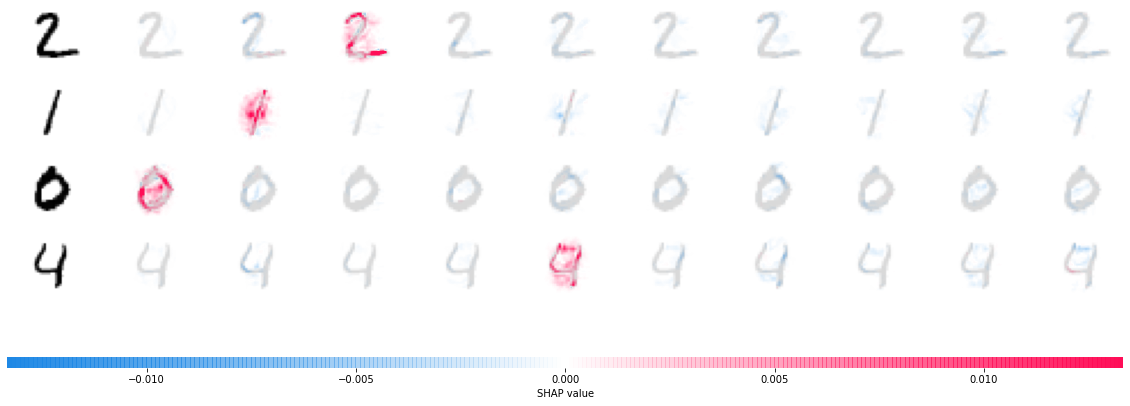

In [7]:
shap.image_plot(shap_values, -x_test[1:5])